In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [31]:
column_names = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
efficiency = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df = pd.DataFrame(efficiency, columns=column_names)
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


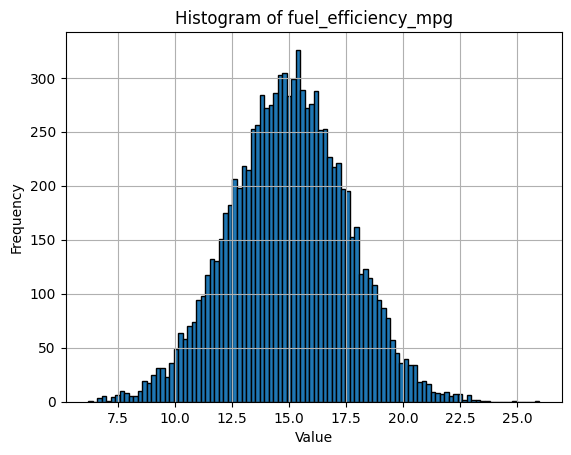

In [32]:
df.hist(column='fuel_efficiency_mpg', bins=100, edgecolor='black')
plt.title('Histogram of fuel_efficiency_mpg')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

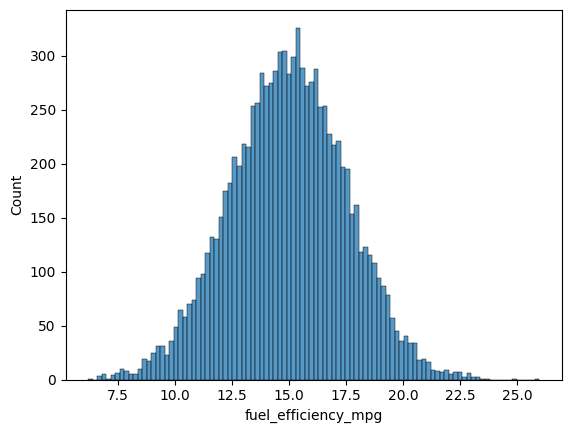

In [33]:
sns.histplot(df.fuel_efficiency_mpg, bins=100, edgecolor='black')

In [34]:
df.isnull().any(axis=0).sum

<bound method Series.sum of engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool>

In [35]:
df['horsepower'].median()

np.float64(149.0)

In [36]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(1940, 1940, 5824)

In [37]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [38]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]


len(df_val), len(df_test), len(df_train)

(1940, 1940, 5824)

In [39]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [40]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [41]:
df_train.iloc[10]

engine_displacement     240.000000
horsepower              159.000000
vehicle_weight         2916.987921
model_year             2001.000000
Name: 10, dtype: float64

In [42]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
  
def prepare_X(df):
    X = df.values
    return X

Fill with 0

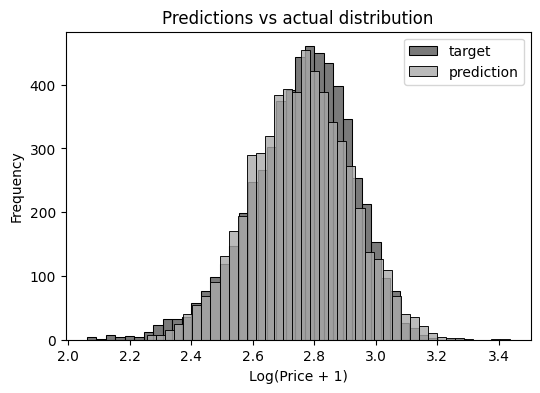

In [43]:
df_filled = df_train.fillna(0)

X_train = prepare_X(df_filled)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

Fill with mean

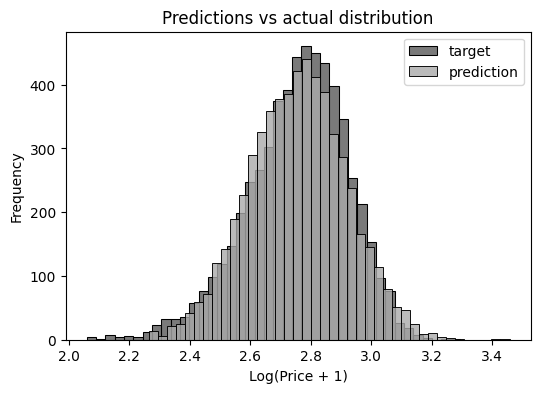

In [44]:
mean_of_horsepower = df_train['horsepower'].mean()
mean_of_horsepower
df_filled_with_mean = df_train.fillna(mean_of_horsepower)

X_train = prepare_X(df_filled_with_mean)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()